# HDFS

Ce TP est une simple introduction à HDFS. Vous travaillerez avec HDFS en vous appuyant sur le client HDFS installé dans le container jupyter. Dans ce TP, vous apprendrez à manipuler HDFS et à comprendre comment vos fichiers sont découpés dans HDFS.


# Début avec HDFS

Vous utiliserez un cluster HDFS avec les composants suivants :
* un container Namenode dont le rôle est de cartographier l'emplacement des blocs par fichier
* 2 containers datanode1 et datanode2 pour le stockage physique des blocs de données.

On notera que des volumes persistents hadoop_datanode1 et hadoop_datanode2 seront associés respectivement aux datanode 1 et 2.
Ces volumes permettent de conserver vos données même si vous supprimer les containers HDFS : vous pourrez donc ré-instantier un cluster sans perdre vos données.
Toutefois, il faudra à la fin de la formation bien penser à supprimer ces volumes pour libérer l'espace disque sur votre machine.

Vous avec dans la section "Préparation de l'environnement" instancié un cluster HDFS que nous allons à présent utiliser : si ce n'est pas votre cas merci de vous référez à la section correspondante.

Pour démarrer votre cluster HDFS, ouvrez un terminal ssh sur votre ordinateur et exécuter la commande suivante :



La figure ci-dessous décrit l'architecture de votre cluster HDFS :

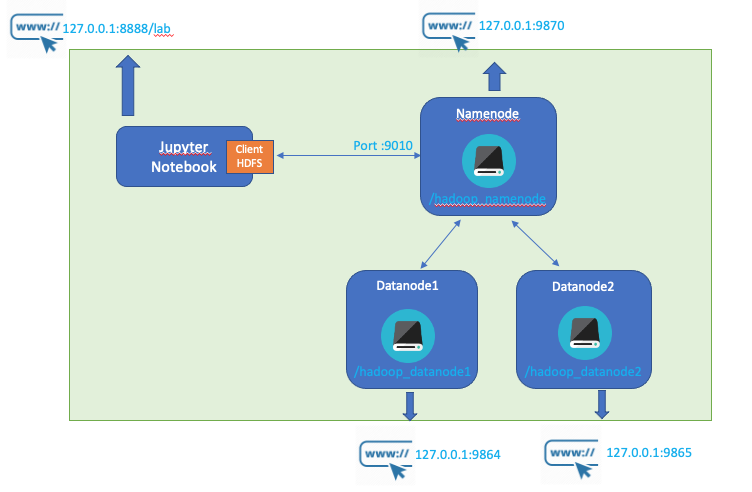

Pour interagir avec HDFS, vous disposez d'une API sur le port 9010 et d'une interface graphique sur le port .



## L'interface graphique 

L'interface graphique est accessible àl'url suivante http://127.0.0.1:9870.

Elle vous permet de visualiser la configuration de votre cluster et son utilisation actuelle :

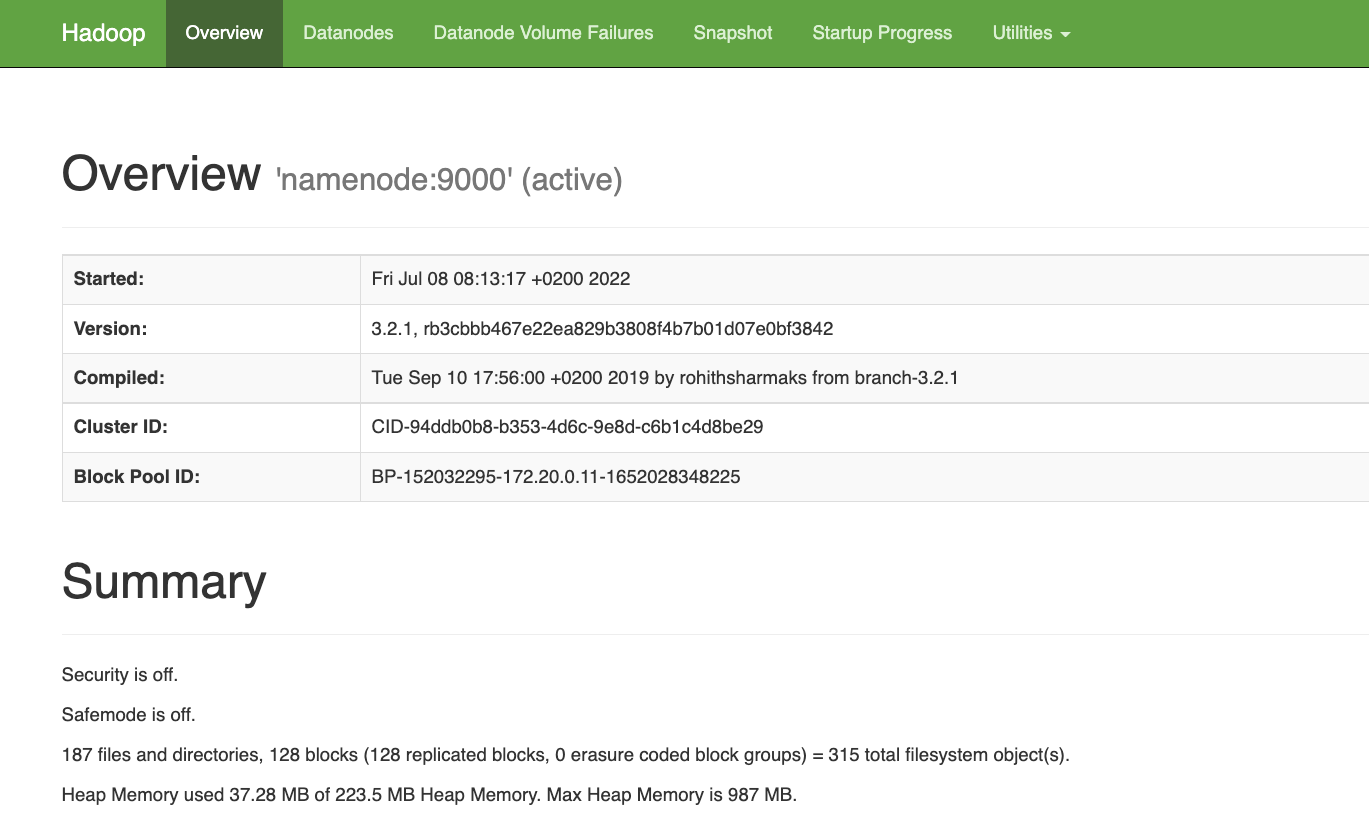

L'onglet Datanode décrit l'état de vos datanodes :

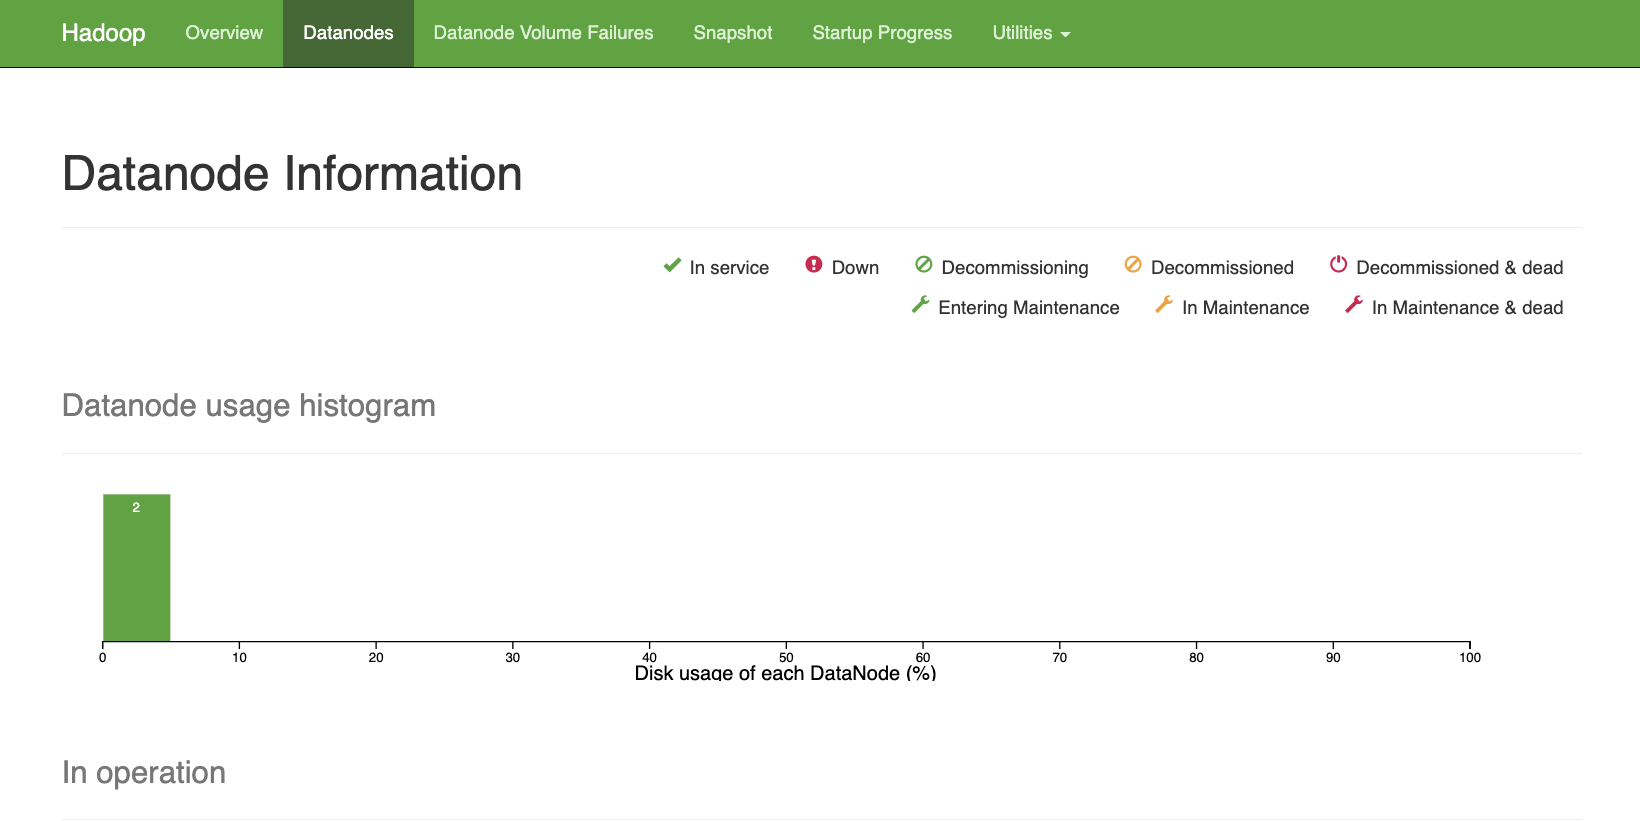

Grâce à l'onglet `utilities` vous pouvez parcourir l'arborescence HDFS et donc de tous les fichiers stockés dans HDFS. 

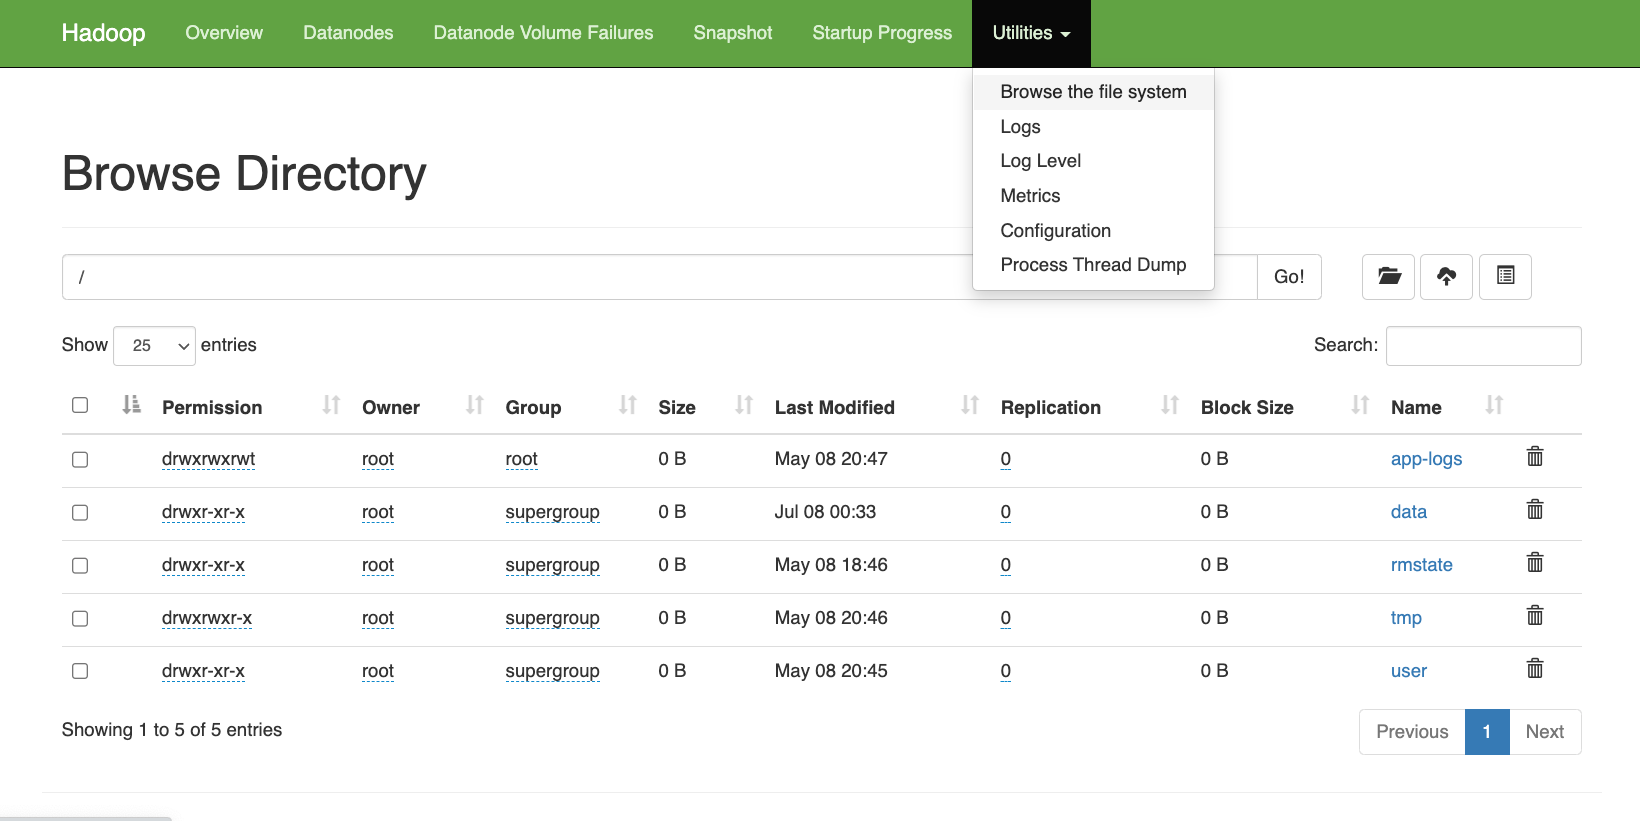

Vous pouvez aussi consulter l'ensemble de la configuration de votre cluster :

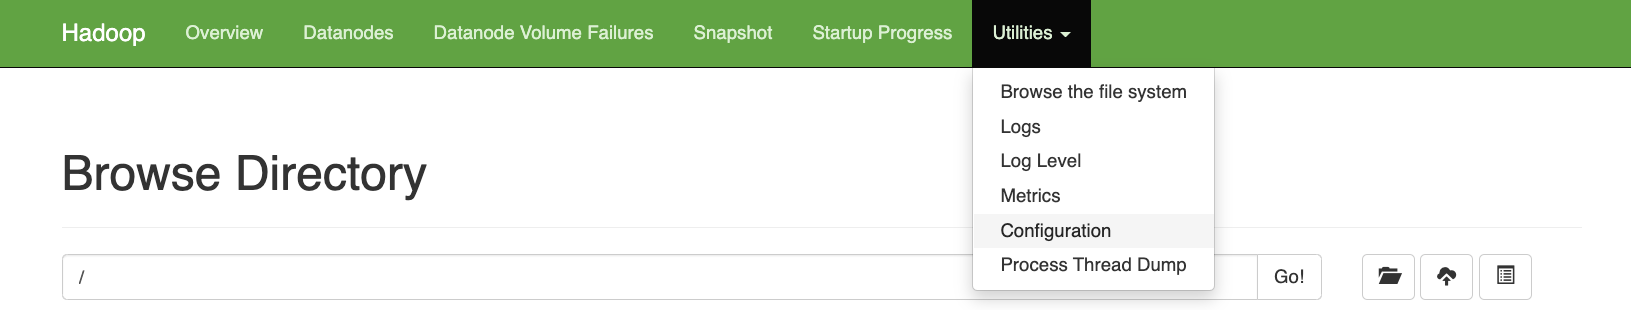

Une interface pratique pour la consultation mais aucune modification n'est possible. Il faudra mettre la main dans le cambouie pour modifier la configuration.
L'ensemble des fichiers de configuration HDFS sont éditable sur le namenode à l'emplacement pointé par la variable $HADOOP_CONF_DIR.


## API HDFS

L'API HDFS est accessible sur le port 9010 du namenode. Vous pouvez donc à partir de langage de programmation disposant des librairies HDFS interagir avec votre cluster HDFS. Dans le cadre de ce TP, nous utiliserons le client hdfs qu'on a préalablement installé dans le container jupyter.

Notez que le client HDFS doit faire parti du cluster HDFS et doit par conséquent être sous le même sous réseau que les machines qui le constitue.

Pour appeler le client hdfs à partir du notebook il suffira d'indiquer dans une cellule Code l'action suivante :

In [1]:
!$HADOOP_HOME/bin/hdfs

Usage: hdfs [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]

  OPTIONS is none or any of:

--buildpaths                       attempt to add class files from build tree
--config dir                       Hadoop config directory
--daemon (start|status|stop)       operate on a daemon
--debug                            turn on shell script debug mode
--help                             usage information
--hostnames list[,of,host,names]   hosts to use in worker mode
--hosts filename                   list of hosts to use in worker mode
--loglevel level                   set the log4j level for this command
--workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

cacheadmin           configure the HDFS cache
crypto               configure HDFS encryption zones
debug                run a Debug Admin to execute HDFS debug commands
dfsadmin             run a DFS admin client
dfsrouteradmin       manage Router-based federation
ec                   run a HD

Par exemple, pour vérifier l'état de notre cluster HDFS on utilisera la commande suivante :

In [2]:
!$HADOOP_HOME/bin/hdfs dfsadmin -report

Configured Capacity: 134743154688 (125.49 GB)
Present Capacity: 57071329280 (53.15 GB)
DFS Remaining: 55253655552 (51.46 GB)
DFS Used: 1817673728 (1.69 GB)
DFS Used%: 3.18%
Replicated Blocks:
	Under replicated blocks: 117
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (2):

Name: 172.20.0.2:9866 (datanode2.docker-hadoop-spark_default)
Hostname: 26d1d3a31c48
Decommission Status : Normal
Configured Capacity: 67371577344 (62.74 GB)
DFS Used: 879087616 (838.36 MB)
Non DFS Used: 35412963328 (32.98 GB)
DFS Remaining: 27626827776 (25.73 GB)
DFS Used%: 1.30%
DFS Remaining%: 41.

Celle-ci nous retourne l'état de notre cluster HDFS :
* la capacité total de stockage
* l'espace total disponible
* le facteur de réplication utilisé par défaut
* l'état de chaque noeud/datanode constituant notre cluster
* ...


Pour rappel HDFS est un systéme de fichiers distribués, un fichier de données est découpé en morceau appelé bloc lesquels sont répartis sur les différentes machines (data node) qui constituent le cluster HDFS.
Au démarrage de HDFS, le namenode reçoit l'ensemble des blocs contenus dans les data nodes pour constuire une carte "géographique" des différents blocs par fichier.



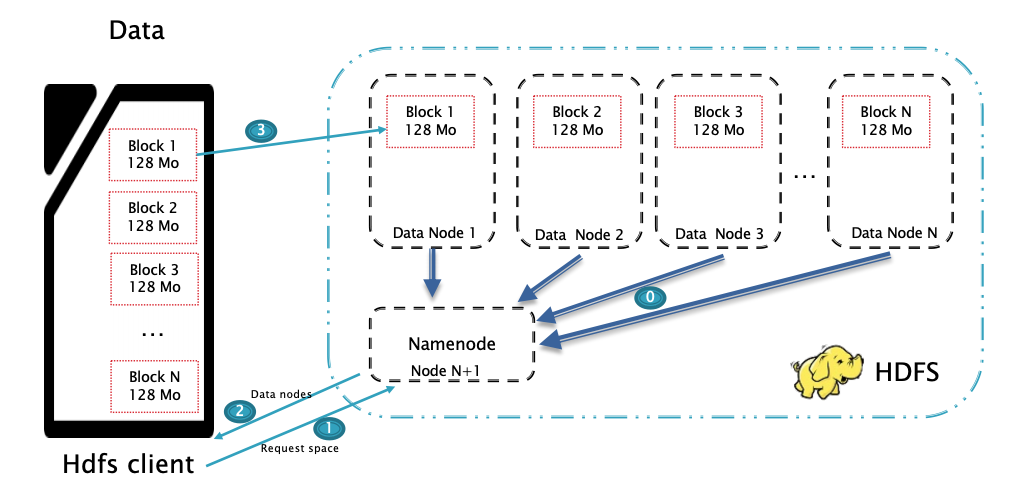

Lorsque le namenode ne reçoit pas la liste des blocs contenus dans un data node, l'intégrité des fichiers de données est alors compromise c'est pourquoi le namenode a un mode de sécurité pour empêcher l'accés à HDFS.

Vous pouvez vérifier le status du cluster avec la commande suivante :

In [5]:
!$HADOOP_HOME/bin/hdfs dfsadmin -safemode get

Safe mode is OFF


Le client HDFS fournit aussi bien des options pour l'administration de notre cluster que pour son utilisation.

En effet, il va nous permettre d'explorer les données contenues dans notre cluster et va nous fournir des commandes similaires aux système de fichiers Linux telles que ls, mkdir, etc.

Pour consulter l'ensemble des options du client HDFS, invoquer le client sans option :



In [13]:
!$HADOOP_HOME/bin/hdfs 

Usage: hdfs [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]

  OPTIONS is none or any of:

--buildpaths                       attempt to add class files from build tree
--config dir                       Hadoop config directory
--daemon (start|status|stop)       operate on a daemon
--debug                            turn on shell script debug mode
--help                             usage information
--hostnames list[,of,host,names]   hosts to use in worker mode
--hosts filename                   list of hosts to use in worker mode
--loglevel level                   set the log4j level for this command
--workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

cacheadmin           configure the HDFS cache
crypto               configure HDFS encryption zones
debug                run a Debug Admin to execute HDFS debug commands
dfsadmin             run a DFS admin client
dfsrouteradmin       manage Router-based federation
ec                   run a HD

Pour explorer les données de notre cluster, nous utiliserons le client hdfs avec l'option dfs.

Prenons un exemple, listons l'arborescence HDFS sous la racine :

In [38]:
!$HADOOP_HOME/bin/hdfs dfs -ls hdfs://namenode:9000/


Found 3 items
-rw-r--r--   3 root   supergroup    4270834 2022-05-13 22:26 hdfs://namenode:9000/data/airlinesample.csv
-rw-r--r--   3 root   supergroup  588253008 2022-05-13 21:31 hdfs://namenode:9000/data/full.csv
drwxr-xr-x   - jovyan supergroup          0 2022-07-07 21:02 hdfs://namenode:9000/data/temporary


Pour créer un répertoire :

In [18]:
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p hdfs://namenode:9000/data/temporary

In [20]:
!$HADOOP_HOME/bin/hdfs dfs -ls hdfs://namenode:9000/data/

Found 3 items
-rw-r--r--   3 root   supergroup    4270834 2022-05-13 22:26 /data/airlinesample.csv
-rw-r--r--   3 root   supergroup  588253008 2022-05-13 21:31 /data/full.csv
drwxr-xr-x   - jovyan supergroup          0 2022-07-07 20:55 /data/temporary


On peut copier des données de notre container jupyter vers notre cluster HDFS.

Prenons l'exemple du fichier `/home/jovyan/data/sales_info.csv`contenu dans le container jupyter :

In [8]:
!ls -al /home/jovyan/data/sales_info.csv

-rw-rw-r-- 1 jovyan root 196 Jul  6 16:43 /home/jovyan/data/sales_info.csv


Ce fichier contient des ventes réalisées par des entreprises :

In [9]:
!cat /home/jovyan/data/sales_info.csv

Company,Person,Sales
GOOG,Sam,200
GOOG,Charlie,120
GOOG,Frank,340
MSFT,Tina,600
MSFT,Amy,124
MSFT,Vanessa,243
FB,Carl,870
FB,Sarah,350
APPL,John,250
APPL,Linda, 130
APPL,Mike, 750
APPL, Chris, 350

Copions à présent ce fichier dans notre cluster HDFS dans le répertoire HDFS précédemment créé  `/data/temporary/` :

In [12]:
## On supprime le fichier si il existe
!$HADOOP_HOME/bin/hdfs dfs -rm hdfs://namenode:9000/data/temporary/sales_info.csv
## On envoie le fichier dans hdfs
!$HADOOP_HOME/bin/hdfs dfs -put /home/jovyan/data/sales_info.csv hdfs://namenode:9000/data/temporary/

Deleted hdfs://namenode:9000/data/temporary/sales_info.csv


Attention, le fichier `/data/temporary/sales_info.csv` est stocké dans HDFS et n'est pas présent dans le container jupyter.

La preuve en image :

In [30]:
!ls -al /data/temporary/sales_info.csv

ls: cannot access '/data/temporary/sales_info.csv': No such file or directory


Regardons dans HDFS : 

In [27]:
!$HADOOP_HOME/bin/hdfs dfs -ls hdfs://namenode:9000/data/temporary/

Found 1 items
-rw-r--r--   1 jovyan supergroup        196 2022-07-07 21:02 /data/temporary/sales_info.csv


On vient de voir comment stocker des fichiers dans notre cluster HDFS et bien entendu l'opération inverse est possible :

In [31]:
!$HADOOP_HOME/bin/hdfs dfs -copyToLocal /data/temporary/sales_info.csv ./sales_info_copy_from_hdfs.csv

On vérifie localement :

In [32]:
!ls -al ./sales_info_copy_from_hdfs.csv

-rw-r--r-- 1 jovyan root 196 Jul  7 21:11 ./sales_info_copy_from_hdfs.csv


On peut aussi lire les données contenues dans hdfs :

In [37]:
!$HADOOP_HOME/bin/hdfs dfs -cat hdfs://namenode:9000/data/temporary/sales_info.csv

Company,Person,Sales
GOOG,Sam,200
GOOG,Charlie,120
GOOG,Frank,340
MSFT,Tina,600
MSFT,Amy,124
MSFT,Vanessa,243
FB,Carl,870
FB,Sarah,350
APPL,John,250
APPL,Linda, 130
APPL,Mike, 750
APPL, Chris, 350

Le client HDFS sur le container jupyter a été configuré par défaut pour communiquer avec le cluster hdfs à l'url suivante hdfs://namenode:9000 .


In [41]:
!cat $HADOOP_CONF_DIR/core-site.xml

<configuration>
<property><name>fs.defaultFS</name><value>hdfs://namenode:9000/</value></property>
</configuration>


Par conséquent, le client HDFS est automatiquement orienté vers l'url ci-dessus et il n'est plus nécessaire de préciser le namenode dans nos commandes.

In [42]:
!$HADOOP_HOME/bin/hdfs dfs -cat /data/temporary/sales_info.csv

Company,Person,Sales
GOOG,Sam,200
GOOG,Charlie,120
GOOG,Frank,340
MSFT,Tina,600
MSFT,Amy,124
MSFT,Vanessa,243
FB,Carl,870
FB,Sarah,350
APPL,John,250
APPL,Linda, 130
APPL,Mike, 750
APPL, Chris, 350

Pour connaitre l'ensemble des commandes disponibles sur le système de fichier HDFS consultez l'aide :

In [51]:
!$HADOOP_HOME/bin/hdfs dfs -help

Usage: hadoop fs [generic options]
	[-appendToFile <localsrc> ... <dst>]
	[-cat [-ignoreCrc] <src> ...]
	[-checksum <src> ...]
	[-chgrp [-R] GROUP PATH...]
	[-chmod [-R] <MODE[,MODE]... | OCTALMODE> PATH...]
	[-chown [-R] [OWNER][:[GROUP]] PATH...]
	[-copyFromLocal [-f] [-p] [-l] [-d] [-t <thread count>] [-q <thread pool queue size>] <localsrc> ... <dst>]
	[-copyToLocal [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>] [-q <thread pool queue size>] <src> ... <localdst>]
	[-count [-q] [-h] [-v] [-t [<storage type>]] [-u] [-x] [-e] <path> ...]
	[-cp [-f] [-p | -p[topax]] [-d] [-t <thread count>] [-q <thread pool queue size>] <src> ... <dst>]
	[-createSnapshot <snapshotDir> [<snapshotName>]]
	[-deleteSnapshot <snapshotDir> <snapshotName>]
	[-df [-h] [<path> ...]]
	[-du [-s] [-h] [-v] [-x] <path> ...]
	[-expunge [-immediate]]
	[-find <path> ... <expression> ...]
	[-get [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>] [-q <thread pool queue size>] <src> ... <localdst>]
	[-getfacl [-R] <pat

Pour administrer votre cluster,  le client HDFS dispose de l'option dfsadmin :

In [13]:
!$HADOOP_HOME/bin/hdfs dfsadmin -help

hdfs dfsadmin performs DFS administrative commands.
Note: Administrative commands can only be run with superuser permission.
The full syntax is: 

hdfs dfsadmin
	[-report [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance]]
	[-safemode <enter | leave | get | wait>]
	[-saveNamespace [-beforeShutdown]]
	[-rollEdits]
	[-restoreFailedStorage true|false|check]
	[-refreshNodes]
	[-setQuota <quota> <dirname>...<dirname>]
	[-clrQuota <dirname>...<dirname>]
	[-setSpaceQuota <quota> [-storageType <storagetype>] <dirname>...<dirname>]
	[-clrSpaceQuota [-storageType <storagetype>] <dirname>...<dirname>]
	[-finalizeUpgrade]
	[-rollingUpgrade [<query|prepare|finalize>]]
	[-upgrade <query | finalize>]
	[-refreshServiceAcl]
	[-refreshUserToGroupsMappings]
	[-refreshSuperUserGroupsConfiguration]
	[-refreshCallQueue]
	[-refresh <host:ipc_port> <key> [arg1..argn]
	[-reconfig <namenode|datanode> <host:ipc_port> <start|status|properties>]
	[-printTopology]
	[-refreshNamenodes datanod

L'option fsck pour "File System ChecK" vous indique l'état du système de fichier ou d'un fichier.
Par exemple, pour identifier la manière dont HDFS a stocké un fichier de données:


In [14]:
!$HADOOP_HOME/bin/hdfs fsck -blocks -locations -files /data/temporary/sales_info.csv

Connecting to namenode via http://namenode:9870/fsck?ugi=jovyan&blocks=1&locations=1&files=1&path=%2Fdata%2Ftemporary%2Fsales_info.csv
FSCK started by jovyan (auth:SIMPLE) from /172.20.0.5 for path /data/temporary/sales_info.csv at Sat Jul 09 09:50:41 UTC 2022
/data/temporary/sales_info.csv 196 bytes, replicated: replication=1, 1 block(s):  OK
0. BP-152032295-172.20.0.11-1652028348225:blk_1073741981_1158 len=196 Live_repl=1  [DatanodeInfoWithStorage[172.20.0.2:9866,DS-0e37705c-0969-4f7c-9ca8-ee25b395c595,DISK]]


Status: HEALTHY
 Number of data-nodes:	2
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	196 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 196 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	3
 Average block replication:	1.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (

On peut voir que notre fichier dispose d'un bloc 0 d'une taille de 196 octets avec un facteur de réplication de 1 et que le block est stocké physiquement sur le datanode dont l'IP est 172.20.0.2. 

Notez que l'IP du datanode dépend de docker et il est probable que celle-ci diffère de celle obtenue ci-dessous.


## 1 - Exercice

Pour organiser les données dans notre Datalake, nous utiliserons la hierarchie suivante :

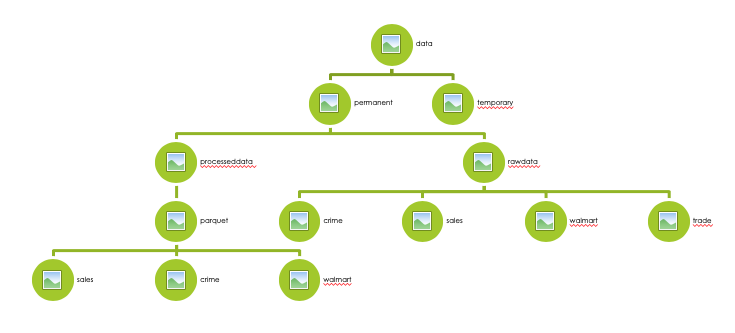

Créer l'arborescence décrite ci-dessus :

In [46]:
# saisissez vos commandes hdfs ci-dessous
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/processeddata/parquet/sales
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/processeddata/parquet/crimes
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/processeddata/parquet/walmart
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/rawdata/crime
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/rawdata/sales
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/rawdata/walmart
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/permanent/rawdata/trade
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /data/temporary

Copier dans le répertoire HDFS /data/permanent/rawdata les fichiers locaux suivants :

In [47]:
# saisissez vos commandes hdfs ci-dessous
!$HADOOP_HOME/bin/hdfs dfs -put /home/jovyan/data/sales_info.csv /data/permanent/rawdata/sales/
!$HADOOP_HOME/bin/hdfs dfs -put /home/jovyan/data/wash_dc_crime_incidents_2013.csv /data/permanent/rawdata/crime/
!$HADOOP_HOME/bin/hdfs dfs -put /home/jovyan/data/appl_stock.csv /data/permanent/rawdata/trade/


Vérifiez que les fichiers ont bien été copiés dans hdfs :

In [48]:
!$HADOOP_HOME/bin/hdfs dfs -ls /data/permanent/rawdata/sales/
!$HADOOP_HOME/bin/hdfs dfs -ls /data/permanent/rawdata/crime/
!$HADOOP_HOME/bin/hdfs dfs -ls /data/permanent/rawdata/trade/


Found 1 items
-rw-r--r--   1 jovyan supergroup        196 2022-07-07 21:38 /data/permanent/rawdata/sales/sales_info.csv
Found 1 items
-rw-r--r--   1 jovyan supergroup    7942203 2022-07-07 21:38 /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv
Found 1 items
-rw-r--r--   1 jovyan supergroup     143130 2022-07-07 21:38 /data/permanent/rawdata/trade/appl_stock.csv


Quel est le facteur de réplication du fichier `/data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv` ?

In [49]:
!$HADOOP_HOME/bin/hdfs fsck -blocks -locations -files /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv


Connecting to namenode via http://namenode:9870/fsck?ugi=jovyan&blocks=1&locations=1&files=1&path=%2Fdata%2Fpermanent%2Frawdata%2Fcrime%2Fwash_dc_crime_incidents_2013.csv
FSCK started by jovyan (auth:SIMPLE) from /172.20.0.6 for path /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv at Thu Jul 07 21:39:01 UTC 2022
/data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv 7942203 bytes, replicated: replication=1, 1 block(s):  OK
0. BP-152032295-172.20.0.11-1652028348225:blk_1073741969_1146 len=7942203 Live_repl=1  [DatanodeInfoWithStorage[172.20.0.4:9866,DS-0e37705c-0969-4f7c-9ca8-ee25b395c595,DISK]]


Status: HEALTHY
 Number of data-nodes:	2
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	7942203 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 7942203 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default r

Supprimez le fichier `/data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv` dans HDFS :

In [55]:
!$HADOOP_HOME/bin/hdfs dfs -rm /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv

Deleted /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv


Copiez à nouveau le fichier mais en spécifiant un facteur de réplication de 3 :

Copiez à nouveau le fichier `./data/wash_dc_crime_incidents_2013.csv`dans `/data/permanent/rawdata/crime/` mais en spécifiant un facteur de réplication de 3 :

Help : On utilisera l'option `-Ddfs.replication=3` avec la commande `hdfs dfs`

In [56]:
!$HADOOP_HOME/bin/hdfs dfs -Ddfs.replication=3 -put /home/jovyan/data/wash_dc_crime_incidents_2013.csv /data/permanent/rawdata/crime

Vérifiez la valeur de replication :

In [58]:
!$HADOOP_HOME/bin/hdfs fsck -blocks -locations -files /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv

Connecting to namenode via http://namenode:9870/fsck?ugi=jovyan&blocks=1&locations=1&files=1&path=%2Fdata%2Fpermanent%2Frawdata%2Fcrime%2Fwash_dc_crime_incidents_2013.csv
FSCK started by jovyan (auth:SIMPLE) from /172.20.0.6 for path /data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv at Thu Jul 07 21:54:54 UTC 2022
/data/permanent/rawdata/crime/wash_dc_crime_incidents_2013.csv 7942203 bytes, replicated: replication=3, 1 block(s):  Under replicated BP-152032295-172.20.0.11-1652028348225:blk_1073741971_1148. Target Replicas is 3 but found 2 live replica(s), 0 decommissioned replica(s), 0 decommissioning replica(s).
0. BP-152032295-172.20.0.11-1652028348225:blk_1073741971_1148 len=7942203 Live_repl=2  [DatanodeInfoWithStorage[172.20.0.4:9866,DS-0e37705c-0969-4f7c-9ca8-ee25b395c595,DISK], DatanodeInfoWithStorage[172.20.0.2:9866,DS-b7a31510-142b-4766-9131-12a3c26cf109,DISK]]


Status: HEALTHY
 Number of data-nodes:	2
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Rep

Pouvez vous expliquez pourquoi le facteur de réplication n'a pas été respécté ?

Télécharger le fichier suivant :

<div class="alert alert-block alert-info">
<b>Note : </b> L'accès à internet est nécessaire.
</div>


Regardez la taille du fichier `/home/jovyan/data/2021-mutations-immobilieres.csv` dans le container jupyter :

In [70]:
!ls -alt ./data/2021-mutations-immobilieres.csv

-rw-r--r-- 1 jovyan root 588253008 Apr 12 14:07 ./data/2021-mutations-immobilieres.csv


Le fichier occupe plus de 500 Mo. 

Avec une taille de block configuré à 128Mo, comment le fichier va-t'il être stocké dans HDFS : 

copier le fichier ci-dessus dans HDFS `/data/permanent/rawdata/trade/` :

In [72]:
!$HADOOP_HOME/bin/hdfs dfs -put ./data/2021-mutations-immobilieres.csv /data/permanent/rawdata/trade/

In [67]:
Vérifiez le nombre de block pour ce fichier :

total 582388
drwsrwsr-x 1 jovyan root      4096 Jul  7 22:09 .
drwsrwsr-x 1 jovyan root      4096 Jul  7 22:09 ..
-rw-r--r-- 1 jovyan root 588253008 Apr 12 14:07 2021-mutations-immobilieres.csv
-rw-rw-r-- 1 jovyan root    143130 Jul  6 16:43 appl_stock.csv
-rw-rw-r-- 1 jovyan root       196 Jul  6 16:43 sales_info.csv
-rw-rw-r-- 1 jovyan root   7942203 Jul  6 16:43 wash_dc_crime_incidents_2013.csv


In [73]:
!$HADOOP_HOME/bin/hdfs fsck -blocks -locations -files /data/permanent/rawdata/trade/2021-mutations-immobilieres.csv

Connecting to namenode via http://namenode:9870/fsck?ugi=jovyan&blocks=1&locations=1&files=1&path=%2Fdata%2Fpermanent%2Frawdata%2Ftrade%2F2021-mutations-immobilieres.csv
FSCK started by jovyan (auth:SIMPLE) from /172.20.0.6 for path /data/permanent/rawdata/trade/2021-mutations-immobilieres.csv at Thu Jul 07 22:20:58 UTC 2022
/data/permanent/rawdata/trade/2021-mutations-immobilieres.csv 588253008 bytes, replicated: replication=1, 5 block(s):  OK
0. BP-152032295-172.20.0.11-1652028348225:blk_1073741972_1149 len=134217728 Live_repl=1  [DatanodeInfoWithStorage[172.20.0.2:9866,DS-b7a31510-142b-4766-9131-12a3c26cf109,DISK]]
1. BP-152032295-172.20.0.11-1652028348225:blk_1073741973_1150 len=134217728 Live_repl=1  [DatanodeInfoWithStorage[172.20.0.4:9866,DS-0e37705c-0969-4f7c-9ca8-ee25b395c595,DISK]]
2. BP-152032295-172.20.0.11-1652028348225:blk_1073741974_1151 len=134217728 Live_repl=1  [DatanodeInfoWithStorage[172.20.0.4:9866,DS-0e37705c-0969-4f7c-9ca8-ee25b395c595,DISK]]
3. BP-152032295-172.